# Loading and Interacting with Models

The second step in the deployment pipeline is to load our trained model and make it accesible via gradio so we can make some useful predictions with it. **Gradio** simplifies the interactions we make with out model by abstracting away the code and presenting users with a simple interface.

In [1]:
# Let's import our dependencies
from fastai.vision.all import *
import gradio as gr

In [3]:
# and grab the function our learner used while it was training, kinda important!
def is_cat(x): return x[0].isupper()

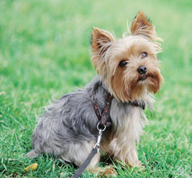

In [8]:
# Let's pull up a dog picture, which we saved to our data folder
im = PILImage.create('data/dog.jpg')
im.thumbnail((192,192))
im

In [11]:
# So let's load our trained model and do some work with it
learn = load_learner('data/catmodel.pkl')

In [13]:
# We can do a quick prediction by passing our dog image to the model
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9999e-01, 9.3668e-06]))

In [15]:
# Our model still works, now let's have some fun with gradio!
categories = ('Dog', 'Cat')

# Gradio needs a function it can call that returns some useful information - a dictionary
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [17]:
# Let's make sure our function is working
classify_image(im)

{'Dog': 0.9999905824661255, 'Cat': 9.366751328343526e-06}

In [24]:
# Let's put together that gradio interface
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['data/dog.jpg', 'data/cat.jpg', 'data/tank.jpg']

# And launch it so we can open it in our browser
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7864/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f31a895f6d0>, 'http://127.0.0.1:7864/', None)

## Package Script

Alright, Let's package our code up as a script that we can run to get all some wonderful predictive functionality outside of this notebook.

In [ ]:
# Import Dependencies
from fastai.vision.all import *
import gradio as gr

# Reference training function
def is_cat(x): return x[0].isupper()

# Load Model
learn = load_learner('data/catmodel.pkl')

# Set Categories
categories = ('Dog', 'Cat')

# Build Gradio Function
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

# Prep Interface
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['data/dog.jpg', 'data/cat.jpg', 'data/tank.jpg']

# Launch Gradio
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)